In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
hp_csv = pd.read_csv('data/compressed1m_hp.csv')
lp_csv = pd.read_csv('data/compressed1m_lp.csv')

# EDA

## Summary Stats

In [100]:
print(f'High Peace dimensions: {hp_csv.shape}')
print(f'Low Peace dimensions: {lp_csv.shape}')
print(f'Distinct HP countries: {hp_csv.country.unique().shape[0]}')
print(f'Distinct LP countries: {lp_csv.country.unique().shape[0]}')
print(f'HP average word count per article: {hp_csv.wordCount.mean():.1f}')
print(f'LP average word count per article: {lp_csv.wordCount.mean():.1f}')
print(f'HP min word count: {hp_csv.wordCount.min()}, max word count: {hp_csv.wordCount.max()}')
print(f'LP min word count: {lp_csv.wordCount.min()}, max word count: {lp_csv.wordCount.max()}')
print(f'%age of HP articles under 5k words: {hp_csv[hp_csv.wordCount < 5e3].shape[0]/hp_csv.shape[0]*100:.2f}%')
print(f'%age of LP articles under 5k words: {lp_csv[lp_csv.wordCount < 5e3].shape[0]/lp_csv.shape[0]*100:.2f}%')
print(f'HP empty articles: {hp_csv.content.isnull().sum()}')
print(f'LP empty articles: {lp_csv.content.isnull().sum()}')

High Peace dimensions: (1000000, 4)
Low Peace dimensions: (1000000, 4)
Distinct HP countries: 10
Distinct LP countries: 10
HP average word count per article: 906.5
LP average word count per article: 435.6
HP min word count: 1, max word count: 149973
LP min word count: 1, max word count: 101327
%age of HP articles under 5k words: 98.15%
%age of LP articles under 5k words: 99.47%
HP empty articles: 0
LP empty articles: 0


## Distributions

### HP vs. LP

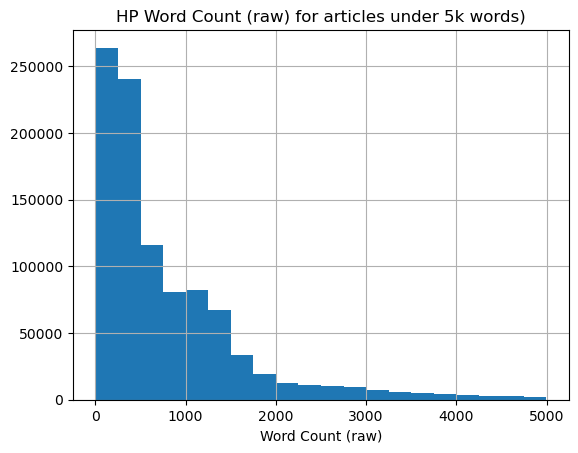

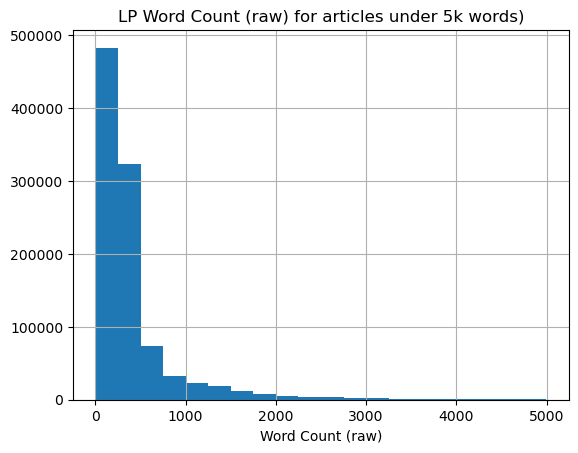

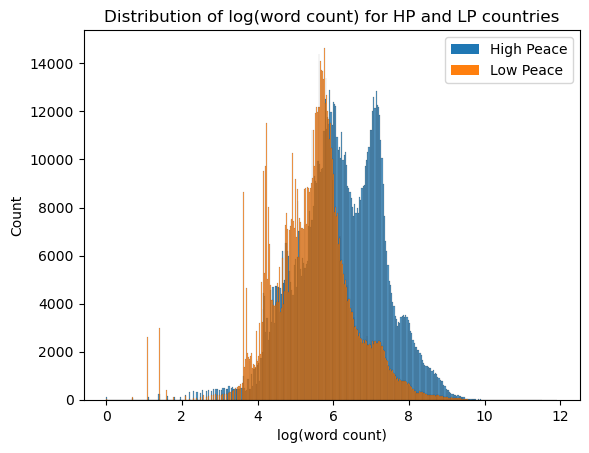

In [135]:
hp_csv[hp_csv.wordCount < 5e3].hist(bins = 20)
plt.title('HP Word Count (raw) for articles under 5k words)')
plt.xlabel('Word Count (raw)')

lp_csv[lp_csv.wordCount < 5e3].hist(bins = 20)
plt.title('LP Word Count (raw) for articles under 5k words)')
plt.xlabel('Word Count (raw)')

#Distribution of word counts in HP vs. LP
fig, ax = plt.subplots()
sns.histplot(x = np.log(hp_csv.wordCount), ax = ax, label = 'High Peace')
sns.histplot(x = np.log(lp_csv.wordCount), ax = ax, label = 'Low Peace')
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[k] for k in [0,2]], [labels[k] for k in [0,2]])
ax.set(title = 'Distribution of log(word count) for HP and LP countries', xlabel = 'log(word count)')
plt.show()

### By country

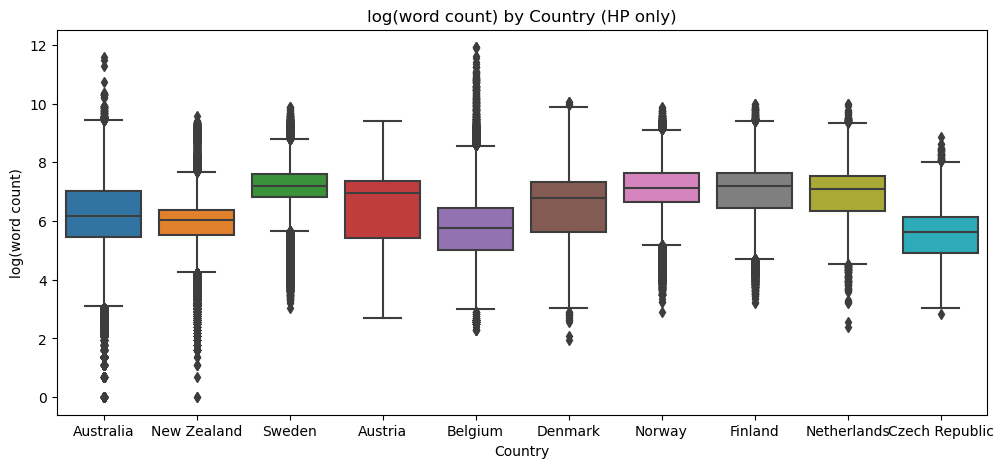

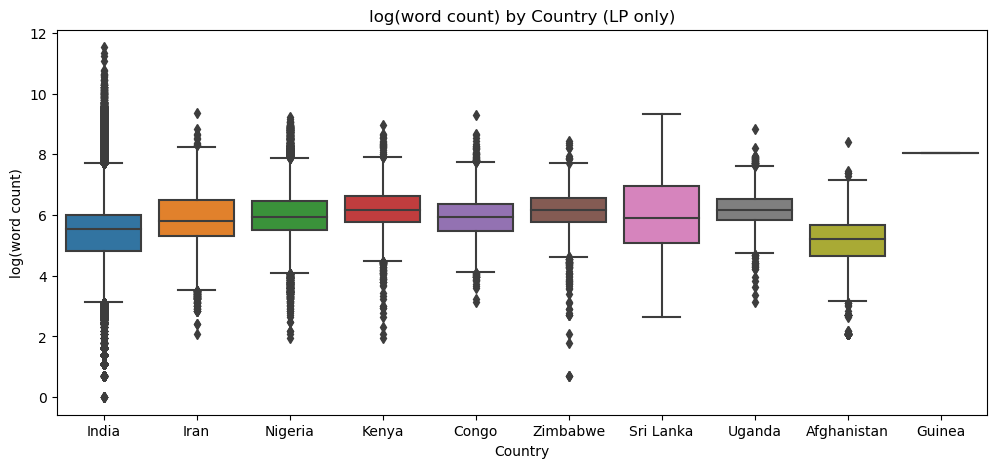

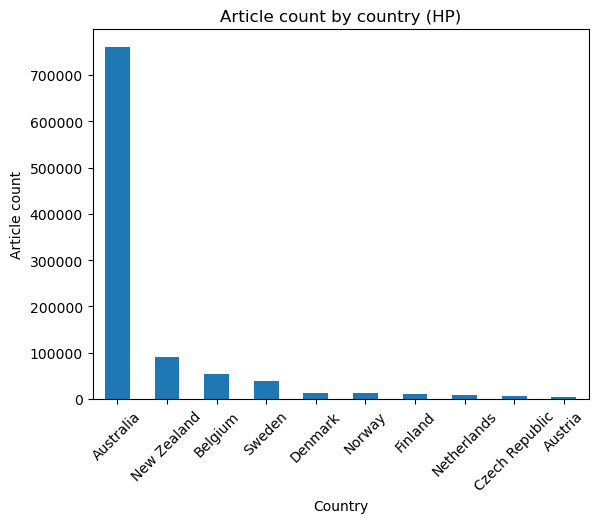

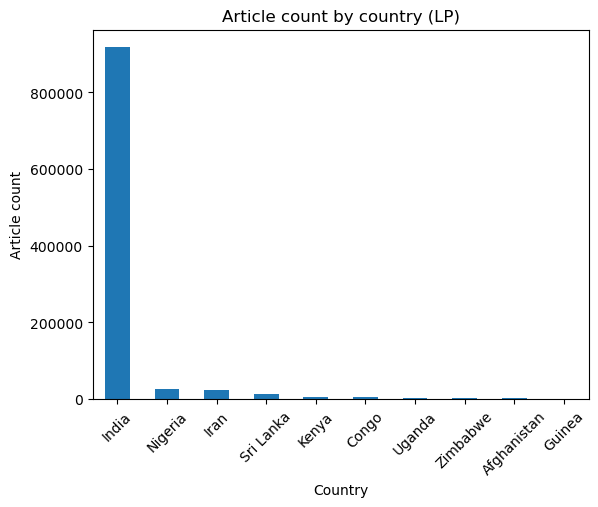

In [136]:
#Distribution of word counts by country in HP
fig, ax = plt.subplots(figsize = (12,5))
sns.boxplot(x = hp_csv['country'], y = np.log(hp_csv['wordCount']), ax = ax)
ax.set(title = 'log(word count) by Country (HP only)', xlabel = 'Country', ylabel = 'log(word count)')
plt.show()

#Distribution of word counts by country in LP
fig, ax = plt.subplots(figsize = (12,5))
sns.boxplot(x = lp_csv['country'], y = np.log(lp_csv['wordCount']), ax = ax)
ax.set(title = 'log(word count) by Country (LP only)', xlabel = 'Country', ylabel = 'log(word count)')
plt.show()

#HP article count by country
hp_csv.country.value_counts().plot(kind = 'bar')
plt.title('Article count by country (HP)')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Article count')
plt.show()

#LP article count by country
lp_csv.country.value_counts().plot(kind = 'bar')
plt.title('Article count by country (LP)')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Article count')
plt.show()

Summary:

LP countries have significantly shorter articles on average, with the average word count being 500 words shorter for LP than HP. Both datasets have some unusually large articles, with the vast majority being under 5k words (above 98% for each). Additionally, each dataset itself is highly imbalanced w.r.t. country. The proportions of articles by country within each class are shown below:

In [134]:
print('High peace:\n\n', hp_csv.country.value_counts(normalize = True).apply(lambda x: f'{x*100:.2f}%'))
print('\n Low peace:\n\n', lp_csv.country.value_counts(normalize = True).apply(lambda x: f'{x*100:.2f}%'))

High peace:

 Australia         76.05%
New Zealand        9.06%
Belgium            5.37%
Sweden             3.94%
Denmark            1.38%
Norway             1.27%
Finland            1.09%
Netherlands        0.82%
Czech Republic     0.59%
Austria            0.42%
Name: country, dtype: object

 Low peace:

 India          91.76%
Nigeria         2.70%
Iran            2.37%
Sri Lanka       1.37%
Kenya           0.52%
Congo           0.50%
Uganda          0.29%
Zimbabwe        0.27%
Afghanistan     0.23%
Guinea          0.00%
Name: country, dtype: object


## Check for duplicates

In [157]:
def get_dupes(df, col, preview = False, headsize = 10):
    duplicates = df[col].value_counts().apply(lambda t: t>1)
    if preview:
        print(df[df[col].apply(lambda ii: duplicates[ii])].sort_values(col).head(headsize))
    return duplicates
    

Massive number of duplicates

In [160]:
textdupes_lp = get_dupes(lp_csv,'content', preview = True, headsize = 8)
print(f'LP duplicates: {textdupes_lp.shape[0]}')
del textdupes_lp

                                                    title  \
272024                       Is Iran going to leave OPEC?   
967670                       Is Iran going to leave OPEC?   
344714                       Is Iran going to leave OPEC?   
696990  Iran must raise import tariffs on stationery t...   
451702  Iran must raise import tariffs on stationery t...   
917087  Iran, Turkmenistan trade turnover surpasses $1...   
766212  Iran, Turkmenistan trade turnover surpasses $1...   
771988  Kailash Kher dropped from Udaipur's local Diwa...   

                                                  content  wordCount country  
272024  "Gas production capacity in Iran in the curren...        458    Iran  
967670  "Gas production capacity in Iran in the curren...        458    Iran  
344714  "Gas production capacity in Iran in the curren...        458    Iran  
696990  "There has been a move towards self-sufficienc...        281    Iran  
451702  "There has been a move towards self-sufficienc.

In [161]:
textdupes_hp = get_dupes(hp_csv,'content', preview = True, headsize = 8)
print(f'HP duplicates: {textdupes_hp.shape[0]}')
del textdupes_hp

                                                    title  \
264839              25 years and still appealing; Insider   
746103              25 years and still appealing; Insider   
347433                                     What they said   
266647                                     What they said   
147115                                     What they said   
516486  Plenty of ban outrage but no solution to Musli...   
83804   Plenty of ban outrage but no solution to Musli...   
349154            Hospitality industry hails visa changes   

                                                  content  wordCount  \
264839  "ARE you thinking what I'm thinking, B1?"\n\n"...        358   
746103  "ARE you thinking what I'm thinking, B1?"\n\n"...        358   
347433  "Congrats to cousin@KearneyRob on behalf of th...        250   
266647  "Congrats to cousin@KearneyRob on behalf of th...        250   
147115  "Congrats to cousin@KearneyRob on behalf of th...        250   
516486  "DONALD J.

Check by country

In [162]:
def duplicated_across_feature(df, col1, col2):
    """Checks if there are duplicates in col1 across different features in col2
     For example, col1 could be the text column, col2 the country column, to check if there are text duplicates
     across different countries.
     
     args: 
         df: dataframe
         col1: column to check for duplicates
         col2: feature to count duplicates against
    returns: 
        dataframe giving count of distinct col2 values where duplicate col1 values occur"""
    col1dupe_col2 = df.groupby(col1)[col2].apply(lambda t: t.unique())
    col1dupe_col2.name = col2+'_list'
    col1dupe_col2 = col1dupe_col2.reset_index()
    col1dupe_col2[col2+'_count'] = col1dupe_col2[col2+'_list'].apply(lambda t:len(t))
    return col1dupe_col2

In [167]:
lp_countrydupes = duplicated_across_feature(lp_csv, 'content', 'country')
print(f'LP articles duplicated across multiple countries: {(lp_countrydupes.country_count > 1).sum()}')

LP articles duplicated across multiple countries: 35


In [168]:
hp_countrydupes = duplicated_across_feature(hp_csv, 'content', 'country')
print(f'HP articles duplicated across multiple countries: {(hp_countrydupes.country_count > 1).sum()}')

HP articles duplicated across multiple countries: 68


Luckily, the number of duplicates occurring across countries is relatively low. I will remove these entirely for now, but we could imagine keeping one copy for each country where it was published.

In [175]:
lp_dup_drops = lp_countrydupes[lp_countrydupes.country_count > 1].content.values

In [183]:
lp_nodupes = lp_csv[~lp_csv.content.isin(lp_dup_drops)].drop_duplicates()

In [184]:
x = get_dupes(lp_nodupes, 'content')

In [195]:
lp_nodupes.shape[0]

996134

In [194]:
lp_nodupes.loc[:,['content', 'country']].drop_duplicates()

,content,country
0,INDIAN DAILY STOCK REPORT\n\nAtlas Cycles (Har...,India
1,"Mumbai (Maharashtra) [India], August 12 (ANI):...",India
2,Vadodara: After conducting an intense drive fo...,India
3,Washington: UNITED STATES DISTRICT COURT NORTH...,India
4,Tehran: The official news agency of Iran (IRNA...,Iran
...,...,...
999995,FULL TEXT\n\n\n\nPublication Name: Software Pa...,India
999996,INDIAN INTRA-DAY STOCK REPORT\n\nWilliamson Ma...,India
999997,"Slovenia, Nov. 14 -- Slovenia based LJUBLJANSK...",India
999998,"India ,April 10 -- Tender No. CCNW/PR11300076...",India


Something weird is going on with the duplicates: get_dupes is finding massive numbers of duplicate articles based on 'content' column -- but even after dropping those spanning multiple countries and dropping duplicates based only on country and content, many duplicates still found. Will need to inspect when more time.

# Encoding for word stats